Used to stitch different data sources together. The data sources are:
carracing standard (green, red, blue), carracing bus (green)

In [1]:
import pickle
import os

print(os.path.abspath(os.curdir))
os.chdir("..")
print(os.path.abspath(os.curdir))

/Users/antonioricciardi/projects/rl_relrepr_gymnasium/notebooks
/Users/antonioricciardi/projects/rl_relrepr_gymnasium


In [2]:
sources = ["data/anchors/CarRacing-v2/rgb_ppo_transitions_green_obs.pkl", "data/anchors/CarRacing-v2/rgb_ppo_transitions_red_obs.pkl", "data/anchors/CarRacing-v2-bus/rgb_ppo_transitions_green_obs.pkl", "data/anchors/CarRacing-v2-tuktuk/rgb_ppo_transitions_green_obs.pkl"]

In [3]:
# print working directory
print(os.getcwd())

/Users/antonioricciardi/projects/rl_relrepr_gymnasium


In [4]:
data0 = pickle.load(open(sources[0], "rb"))
data1 = pickle.load(open(sources[1], "rb"))
data2 = pickle.load(open(sources[2], "rb"))
data3 = pickle.load(open(sources[3], "rb"))

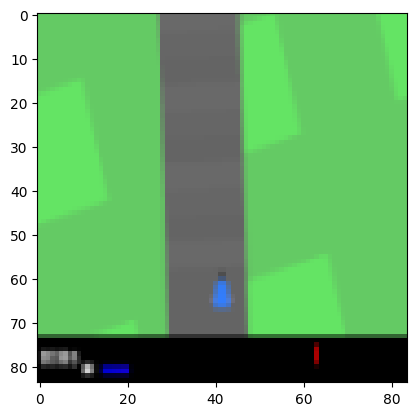

In [5]:
# plot ith element of data0
import matplotlib.pyplot as plt
import numpy as np
import cv2

i = 222
obs = data3[i]
plt.imshow(obs.transpose(1, 2, 0))
plt.show()

In [6]:
# join data0 and data1, 2000 elements for each, totalling 4000
data = data0[:1000] + data1[:2000] + data2[:1000] + data3[:1000]

In [7]:
os.makedirs("data/anchors/CarRacing-v2-unified", exist_ok=True)

In [8]:
# save the joined data
pickle.dump(data, open("data/anchors/CarRacing-v2-unified/rgb_ppo_transitions_red_green_bus_tuktuk_obs.pkl", "wb"))

# Dataset augmentation

In [9]:
# load lunar lander data
data = pickle.load(open("data/anchors/LunarLanderRGB/rgb_ppo_transitions_white_obs.pkl", "rb"))

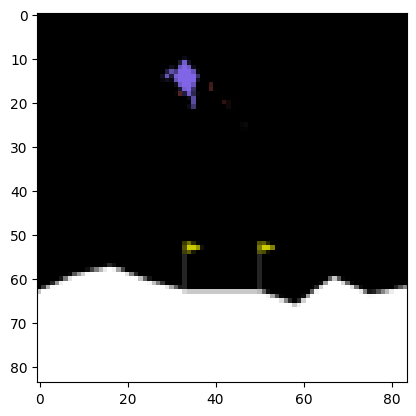

In [10]:
# plot example data
i = 800
obs = data[i]
plt.imshow(obs.transpose(1, 2, 0))
plt.show()


In [11]:
import albumentations as A
import random 
def get_albumentations_transform():
    """
    Define the augmentation pipeline using Albumentations.
    
    Returns:
        A.Compose: Albumentations compose object with defined augmentations.
    """
    transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Rotate(limit=30, p=0.5),  # Rotate between -30 and +30 degrees
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0, rotate_limit=0, p=0.5),
        # A.RandomTranspose(p=0.3),
        A.RandomCrop(width=63, height=63, p=0.3),
        A.Resize(width=84, height=84, p=1.0),  # Resize back to original size
    ], p=0.8)  # Overall probability to apply the transformations
    return transform

In [12]:
def augment_with_albumentations(dataset):
    """
    Perform data augmentation using Albumentations.
    
    Args:
        dataset (list of np.ndarray): List of images with shape (3, 84, 84).
        
    Returns:
        list of np.ndarray: List of augmented images with shape (3, 84, 84).
    """
    transform = get_albumentations_transform()
    augmented_dataset = []
    
    for idx, image in enumerate(dataset):
        # Convert image to (84, 84, 3)
        img = np.transpose(image, (1, 2, 0))
        
        # Apply transformations with probability
        if random.random() < 0.8:  # 80% chance to apply augmentations
            augmented = transform(image=img)['image']
            augmented = (augmented * 255).astype(np.uint8)  # Convert back to uint8
        else:
            augmented = img  # No augmentation
        
        # Convert back to (3, 84, 84)
        augmented = np.transpose(augmented, (2, 0, 1))
        augmented_dataset.append(augmented)
        
        # Optional: Print progress
        if (idx + 1) % 100 == 0:
            print(f"Augmented {idx + 1} images with Albumentations")
    
    return augmented_dataset

In [13]:
augmented_dataset_alb = augment_with_albumentations(data)

print(f"Original dataset size: {len(data)}")
print(f"Augmented dataset size with Albumentations: {len(augmented_dataset_alb)}")

/Users/antonioricciardi/projects/rl_relrepr_gymnasium/.venv/lib/python3.9/site-packages/albumentations/core/validation.py:45: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Augmented 100 images with Albumentations
Augmented 200 images with Albumentations
Augmented 300 images with Albumentations
Augmented 400 images with Albumentations
Augmented 500 images with Albumentations
Augmented 600 images with Albumentations
Augmented 700 images with Albumentations
Augmented 800 images with Albumentations
Augmented 900 images with Albumentations
Augmented 1000 images with Albumentations
Augmented 1100 images with Albumentations
Augmented 1200 images with Albumentations
Augmented 1300 images with Albumentations
Augmented 1400 images with Albumentations
Augmented 1500 images with Albumentations
Augmented 1600 images with Albumentations
Augmented 1700 images with Albumentations
Augmented 1800 images with Albumentations
Augmented 1900 images with Albumentations
Augmented 2000 images with Albumentations
Augmented 2100 images with Albumentations
Augmented 2200 images with Albumentations
Augmented 2300 images with Albumentations
Augmented 2400 images with Albumentations
A

In [14]:
augmented_dataset_alb[0].shape

(3, 84, 84)

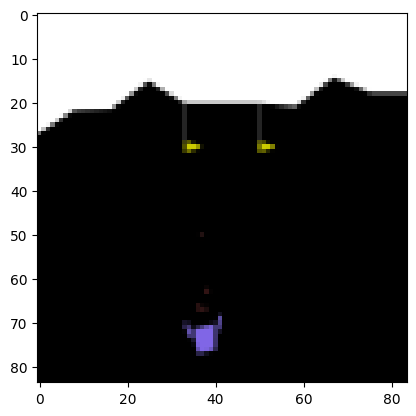

In [15]:
# plot example augmented data
i = 50
obs = augmented_dataset_alb[i]
plt.imshow(obs.transpose(1, 2, 0))
plt.show()

In [16]:
# save augmented data
pickle.dump(augmented_dataset_alb, open("data/anchors/LunarLanderRGB/rgb_ppo_transitions_white_obs_augmented.pkl", "wb"))